# **Classification Binaire**  
Appliquez l'apprentissage profond à une autre tâche courante.


## Introduction  
Jusqu'à présent dans ce cours, nous avons appris comment les **réseaux de neurones** peuvent résoudre des problèmes de **régression**. Maintenant, nous allons appliquer les réseaux de neurones à un autre problème courant en apprentissage automatique : la **classification**. La plupart de ce que nous avons appris jusqu'à présent reste applicable. **La principale différence réside dans la fonction de perte que nous utilisons et dans le type de sorties que nous voulons que la dernière couche produise**.

---

### **Classification Binaire**  
La classification en deux classes est un problème courant en apprentissage automatique. Vous pourriez vouloir prédire si un client est susceptible de faire un achat, si une transaction par carte de crédit est frauduleuse, si des signaux de l'espace lointain montrent des preuves d'une nouvelle planète, ou si un test médical montre des preuves d'une maladie. Ce sont tous des problèmes de classification binaire.

Dans vos données brutes, les classes pourraient être représentées par des chaînes de caractères comme "**Oui**" et "**Non**", ou "**Chien**" et "**Chat**". Avant d'utiliser ces données, nous allons attribuer une étiquette de classe : **une classe sera 0 et l'autre sera 1**. L'attribution d'étiquettes numériques met les données dans un format que le réseau de neurones peut utiliser.


---

### **Précision et Entropie Croisée**  
La **précision** est l'une des nombreuses métriques utilisées pour mesurer le succès dans un problème de classification. *La précision est le ratio des prédictions correctes par rapport au total des prédictions* :  
**précision = nombre_correct / total**. 

Un modèle qui prédit toujours correctement aurait un **score de précision de 1.0**. Toutes choses étant égales par ailleurs, la précision est une métrique raisonnable à utiliser lorsque les classes dans l'ensemble de données apparaissent avec une fréquence similaire.

**Le problème avec la précision (et la plupart des autres métriques de classification) est qu'elle ne peut pas être utilisée comme fonction de perte**. La descente de gradient stochastique (**SGD**) a besoin d'une fonction de perte qui change de manière fluide, mais la précision, étant un **ratio de comptes**, change par "**sauts**". Nous devons donc choisir un substitut pour agir comme fonction de perte. Ce substitut est la **fonction d'entropie croisée**.

Rappelez-vous que la fonction de perte définit l'objectif du réseau pendant l'entraînement. Avec la régression, notre objectif était de minimiser la distance entre le résultat attendu et le résultat prédit. Nous avons choisi l'erreur absolue moyenne (MAE) pour mesurer cette distance.

Pour la classification, ce que nous voulons à la place est une distance entre les **probabilités**, et c'est ce que l'entropie croisée fournit. **L'entropie croisée est une sorte de mesure de la distance entre deux distributions de probabilité**.

---

### **Graphiques de précision et d'entropie croisée**  
L'entropie croisée pénalise les prédictions de probabilité incorrectes.  
L'idée est que nous voulons que notre réseau prédise la classe correcte avec une probabilité de 1.0. Plus la probabilité prédite est éloignée de 1.0, plus la perte d'entropie croisée sera grande.

Les raisons techniques pour lesquelles nous utilisons l'entropie croisée sont un peu subtiles, mais l'essentiel à retenir de cette section est ceci : utilisez l'entropie croisée comme fonction de perte pour la classification ; d'autres métriques qui vous intéressent (comme la précision) auront tendance à s'améliorer en même temps.

---

### **Créer des Probabilités avec la Fonction Sigmoïde**  
L'entropie croisée et la précision nécessitent toutes deux des probabilités en entrée, c'est-à-dire des nombres entre 0 et 1. Pour convertir les sorties à valeurs réelles produites par une couche dense en probabilités, nous attachons un nouveau type de fonction d'activation : la **fonction d'activation sigmoïde**.

Le graphique de la sigmoïde a une forme en "S" avec des asymptotes horizontales à 0 à gauche et 1 à droite.  
La fonction sigmoïde transforme les nombres réels en l'intervalle [0, 1].  
Pour obtenir la prédiction finale de classe, nous définissons un **seuil de probabilité**. Typiquement, ce sera 0.5, de sorte que l'arrondi nous donnera la classe correcte : en dessous de 0.5 signifie la classe avec l'étiquette 0, et 0.5 ou plus signifie la classe avec l'étiquette 1. Un seuil de 0.5 est ce que Keras utilise par défaut avec sa métrique de précision.

---

# **Exemple - Classification Binaire**  
Maintenant, essayons cela !

L'ensemble de données **Ionosphere** contient des caractéristiques obtenues à partir de signaux radar focalisés sur la couche ionosphérique de l'atmosphère terrestre. La tâche consiste à déterminer si le signal montre la présence d'un objet ou simplement de l'air vide.


In [15]:
import pandas as pd
from IPython.display import display

# Charger les données Ionosphere
ion = pd.read_csv('ion.csv', index_col=0)
display(ion.head())

# Préparer les données
df = ion.copy()
df['Class'] = df['Class'].map({'good': 0, 'bad': 1})  # Convertir les classes en 0 et 1

# Diviser les données en ensembles d'entraînement et de validation
df_train = df.sample(frac=0.7, random_state=0)
df_valid = df.drop(df_train.index)

# Normaliser les données
max_ = df_train.max(axis=0)
min_ = df_train.min(axis=0)
df_train = (df_train - min_) / (max_ - min_)
df_valid = (df_valid - min_) / (max_ - min_)

# Supprimer les colonnes vides
df_train.dropna(axis=1, inplace=True)
df_valid.dropna(axis=1, inplace=True)

# Séparer les caractéristiques et la cible
X_train = df_train.drop('Class', axis=1)
X_valid = df_valid.drop('Class', axis=1)
y_train = df_train['Class']
y_valid = df_valid['Class']

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V26,V27,V28,V29,V30,V31,V32,V33,V34,Class
1,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,good
2,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,bad
3,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,good
4,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,bad
5,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,good


### Définir le Modèle
Nous allons définir notre modèle comme nous l'avons fait pour les tâches de régression, avec une exception. Dans la dernière couche, incluez une activation '**sigmoid**' pour que le modèle produise des probabilités de classe.


In [20]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Input(shape=[33]),
    layers.Dense(4, activation='relu'),
    layers.Dense(4, activation='relu'),    
    layers.Dense(1, activation='sigmoid'),  # Activation sigmoïde pour la classification binaire
])

### Compiler le Modèle 
Ajoutez la fonction de perte d'**entropie croisée et la métrique de précision** au modèle avec sa méthode `compile`. Pour les problèmes à deux classes, assurez-vous d'utiliser les versions 'binaires'. (**Les problèmes avec plus de classes seront légèrement différents**.) L'optimiseur **Adam** fonctionne également très bien pour la classification, donc nous allons l'utiliser.

In [23]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',  # Entropie croisée binaire pour la classification binaire
    metrics=['binary_accuracy'],  # Précision binaire comme métrique
)

### Ajouter un Callback d'Arrêt Précoce  
Le modèle dans ce problème particulier peut prendre beaucoup d'époques pour terminer l'entraînement, donc nous allons inclure un callback d'arrêt précoce pour plus de commodité.


In [25]:
early_stopping = keras.callbacks.EarlyStopping(
    patience=10,  # Nombre d'époques à attendre sans amélioration
    min_delta=0.001,  # Amélioration minimale requise
    restore_best_weights=True,  # Restaurer les meilleurs poids
)

# Entraîner le modèle
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=512,
    epochs=1000,
    callbacks=[early_stopping],
    verbose=0,  # Masquer la sortie car nous avons beaucoup d'époques
)

### Analyser les Résultats  
Nous allons examiner les courbes d'apprentissage comme toujours, et également inspecter les meilleures valeurs pour la perte et la précision obtenues sur l'ensemble de validation. (Rappelez-vous que l'arrêt précoce restaurera les poids à ceux qui ont obtenu ces valeurs.)


Meilleure perte de validation : 0.2994
Meilleure précision de validation : 0.9048


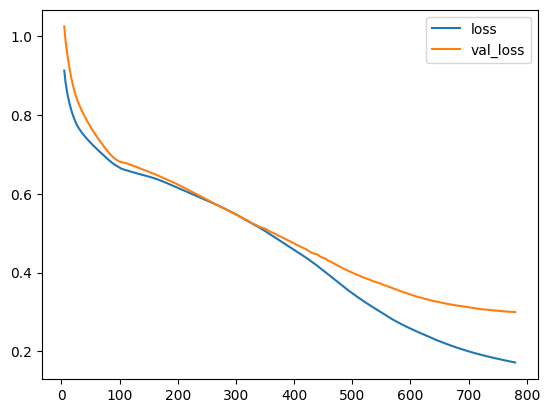

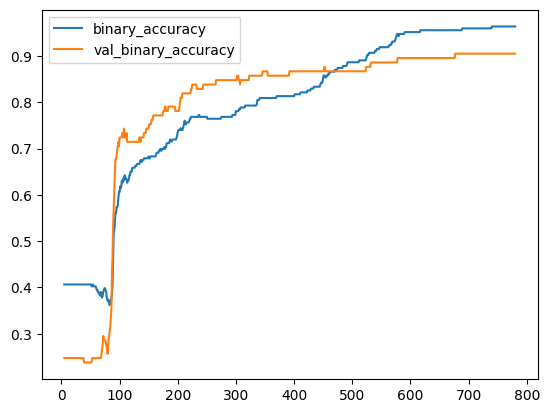

In [29]:
history_df = pd.DataFrame(history.history)
# Commencer le graphique à l'époque 5
history_df.loc[5:, ['loss', 'val_loss']].plot()
history_df.loc[5:, ['binary_accuracy', 'val_binary_accuracy']].plot()

print(("Meilleure perte de validation : {:0.4f}" +\
      "\nMeilleure précision de validation : {:0.4f}")\
      .format(history_df['val_loss'].min(), 
              history_df['val_binary_accuracy'].max()))


Les résultats attendus indiquent les performances du modèle sur l'ensemble de validation après l'entraînement. Voici une interprétation détaillée de ces résultats :

---

### **1. Meilleure perte de validation : 0.3534**
- **Qu'est-ce que la perte de validation ?**  
  La perte de validation mesure à quel point les prédictions du modèle sont éloignées des valeurs réelles sur l'ensemble de validation. Ici, la perte est calculée avec la **fonction d'entropie croisée binaire** (`binary_crossentropy`), qui est couramment utilisée pour les problèmes de classification binaire.
  
- **Interprétation :**  
  Une perte de **0.3534** signifie que le modèle est relativement performant, car une perte plus faible indique que les prédictions du modèle sont proches des vraies étiquettes. Cependant, la valeur absolue de la perte dépend du problème et des données. Dans ce cas, une perte de 0.3534 suggère que le modèle a bien appris à distinguer les deux classes, mais il reste une marge d'amélioration.

---

### **2. Meilleure précision de validation : 0.8857**
- **Qu'est-ce que la précision de validation ?**  
  La précision de validation mesure la proportion de prédictions correctes par rapport au total des prédictions sur l'ensemble de validation. Ici, la précision est calculée avec la **précision binaire** (`binary_accuracy`), qui est adaptée aux problèmes de classification binaire.

- **Interprétation :**  
  Une précision de **0.8857** signifie que le modèle prédit correctement la classe dans **88.57 % des cas** sur l'ensemble de validation. Cela indique que le modèle est très performant, car il classe correctement la grande majorité des échantillons. Une précision de 88.57 % est généralement considérée comme excellente pour de nombreux problèmes de classification binaire.

---

### **Analyse globale :**
- **Performance du modèle :**  
  Le modèle a atteint une **perte de validation de 0.3534** et une **précision de validation de 88.57 %**. Cela montre que le modèle est capable de bien généraliser sur des données qu'il n'a jamais vues auparavant (l'ensemble de validation).

- **Améliorations possibles :**  
  Bien que les résultats soient déjà bons, il pourrait être possible d'améliorer davantage le modèle en :
  - Ajoutant plus de couches ou de neurones.
  - Utilisant des techniques de régularisation (comme le dropout) pour éviter le surapprentissage.
  - Optimisant les hyperparamètres (taux d'apprentissage, taille des lots, etc.).

- **Conclusion :**  
  Ces résultats montrent que le modèle est efficace pour résoudre le problème de classification binaire posé. Il est prêt à être utilisé pour faire des prédictions sur de nouvelles données, avec une confiance élevée dans ses prédictions.

--- 

En résumé, ces résultats indiquent que le modèle est performant et prêt à être déployé pour des prédictions réelles. 😊
---

### À vous de jouer  
Utilisez un réseau de neurones pour prédire les annulations de réservations d'hôtel avec l'ensemble de données **Hotel Cancellations**.

Vous avez des questions ou des commentaires ? Visitez le forum de discussion du cours pour discuter avec d'autres apprenants.

# **EXERCICE** 
Dans cet exercice, vous allez construire un **modèle de classification binaire pour prédire les annulations d'hôtel**.

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")     # Changer le style de la figure
plt.rc('figure', autolayout=True)  # Ajustement automatique des figures
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)
plt.rc('animation', html='html5')  # Configuration des animations


In [43]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer

hotel = pd.read_csv('hotel.csv')


X = hotel.copy()
y = X.pop('is_canceled')

X['arrival_date_month'] = \
    X['arrival_date_month'].map(
        {'January':1, 'February': 2, 'March':3,
         'April':4, 'May':5, 'June':6, 'July':7,
         'August':8, 'September':9, 'October':10,
         'November':11, 'December':12}
    )


features_num = [
    "lead_time", "arrival_date_week_number",
    "arrival_date_day_of_month", "stays_in_weekend_nights",
    "stays_in_week_nights", "adults", "children", "babies",
    "is_repeated_guest", "previous_cancellations",
    "previous_bookings_not_canceled", "required_car_parking_spaces",
    "total_of_special_requests", "adr",
]


features_cat = [
    "hotel", "arrival_date_month", "meal",
    "market_segment", "distribution_channel",
    "reserved_room_type", "deposit_type", "customer_type",
]


transformer_num = make_pipeline(
    SimpleImputer(strategy="constant"), # Quelques valeurs manquantes
    StandardScaler(),
)


transformer_cat = make_pipeline(
    SimpleImputer(strategy="constant", fill_value="NA"),
    OneHotEncoder(handle_unknown='ignore'),
)


preprocessor = make_column_transformer(
    (transformer_num, features_num),
    (transformer_cat, features_cat),
)


X_train, X_valid, y_train, y_valid = \
    train_test_split(X, y, stratify=y, train_size=0.75)


X_train = preprocessor.fit_transform(X_train)
X_valid = preprocessor.transform(X_valid)


input_shape = [X_train.shape[1]]


---
### Question 1) Définir le Modèle 

Le modèle que nous allons utiliser cette fois-ci inclura à la fois des **couches de normalisation par lots (Batch Normalization)** et des **couches de dropout**.  

Pour faciliter la lecture, nous avons divisé le diagramme en blocs, mais vous pouvez définir le modèle couche par couche comme d'habitude.  

**Définissez un modèle avec l'architecture suivante :**  

📌 **Diagramme de l'architecture du réseau :**  
- **Batch Normalization**  
- **Dense (couche entièrement connectée)**  
- **Batch Normalization**  
- **Dropout**  
- **Dense**  
- **Batch Normalization**  
- **Dropout**  
- **Dense (couche de sortie)**  

Ce modèle est un **classificateur binaire**.

In [47]:
from tensorflow import keras
from tensorflow.keras import layers

# Définition du modèle selon le diagramme
model = keras.Sequential([
    layers.Input(shape=input_shape),
    layers.BatchNormalization(),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid'),  # Activation sigmoïde pour un classificateur binaire
])


---
### Question 2) Ajouter l'Optimiseur, la Fonction de Perte et la Métrique  

Maintenant, compilez le modèle en utilisant l'optimiseur **Adam**, ainsi que la version binaire de la fonction de perte **cross-entropie** et de la métrique **accuracy**.

In [52]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',  # Entropie croisée binaire pour la classification binaire
    metrics=['binary_accuracy'],  # Précision binaire comme métrique
)

Enfin, exécutez cette cellule pour entraîner le modèle et visualiser les courbes d'apprentissage. **L'entraînement peut durer environ 60 à 70 époques**, ce qui pourrait prendre une à deux minutes.

Epoch 1/200
175/175 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - binary_accuracy: 0.7408 - loss: 0.5365 - val_binary_accuracy: 0.7978 - val_loss: 0.4292
Epoch 2/200
175/175 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - binary_accuracy: 0.7981 - loss: 0.4293 - val_binary_accuracy: 0.8104 - val_loss: 0.4032
Epoch 3/200
175/175 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - binary_accuracy: 0.8057 - loss: 0.4117 - val_binary_accuracy: 0.8148 - val_loss: 0.3991
Epoch 4/200
175/175 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - binary_accuracy: 0.8117 - loss: 0.4032 - val_binary_accuracy: 0.8153 - val_loss: 0.3923
Epoch 5/200
175/175 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - binary_accuracy: 0.8160 - loss: 0.3950 - val_binary_accuracy: 0.8195 - val_loss: 0.3885
Epoch 6/200
175/175 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - binary_accuracy: 0.8159 - loss: 0.3949 - val_binary_accuracy: 0.8202 - val_loss: 0.3864
Epoch 7/200
175/175 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - binary_accuracy: 0.8196 - loss: 0.3896 - val_binary_accuracy: 0.8244 - val_loss: 

<Axes: title={'center': 'Accuracy'}>

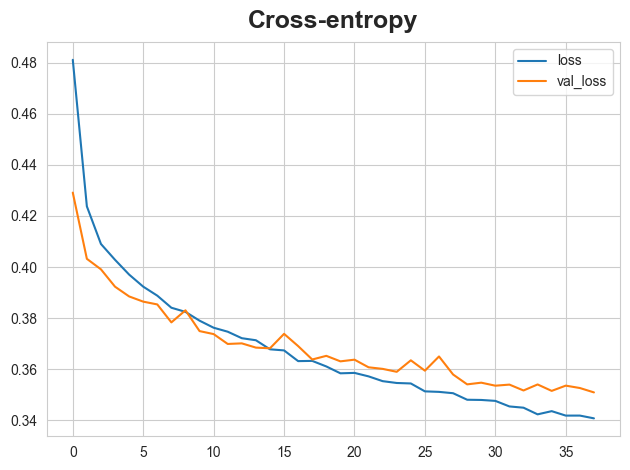

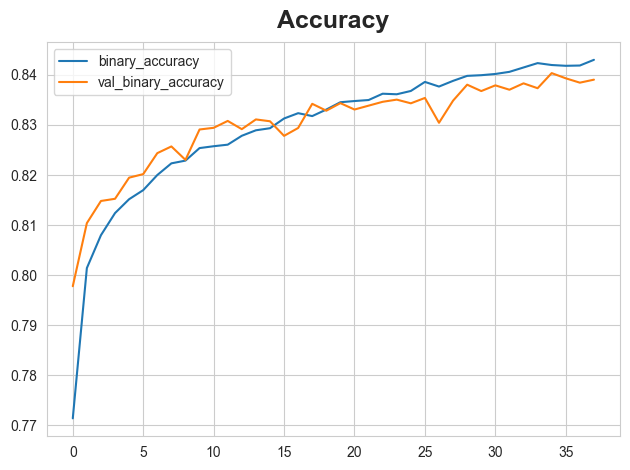

In [56]:
early_stopping = keras.callbacks.EarlyStopping(
    patience=5,
    min_delta=0.001,
    restore_best_weights=True,
)
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=512,
    epochs=200,
    callbacks=[early_stopping],
)

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title="Cross-entropy")
history_df.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot(title="Accuracy")

### 3) Entraîner et Évaluer  
Que pensez-vous des courbes d'apprentissage ? Le modèle semble-t-il sous-ajusté (underfit) ou sur-ajusté (overfit) ? La perte d'entropie croisée était-elle un bon indicateur de la précision ?  

**Réponse correcte** :  
Bien que la perte d'entraînement continue de diminuer, le callback d'arrêt anticipé (early stopping) a empêché tout sur-ajustement. De plus, la précision a augmenté au même rythme que la perte d'entropie croisée a diminué, ce qui montre que minimiser l'entropie croisée était un bon indicateur de performance. Dans l'ensemble, cet entraînement semble être une réussite !  

---

### Conclusion  
Félicitations ! Vous avez terminé le cours d'introduction à l'apprentissage profond de Kaggle !  

Avec ces nouvelles compétences, vous êtes maintenant prêt à explorer des applications plus avancées comme la vision par ordinateur ou la classification de sentiments. Que souhaitez-vous faire ensuite ?  

Pourquoi ne pas essayer l'une de nos compétitions pour débutants ?  

- **Classifiez des images avec les TPU** dans *Petals to the Metal*  
- **Créez des œuvres d'art avec des GANs** dans *I'm Something of a Painter Myself*  
- **Classifiez des tweets** dans *Real or Not? NLP with Disaster Tweets*  
- **Détectez la contradiction et l'implication logique** dans *Contradictory, My Dear Watson*  

À bientôt, Kagglers ! 🚀